In [1]:
from pathomics_research_utils.data_generators import SubPatchingSegmentationDataGenerator
from pathomics_research_utils.models import AlexNetSegmentation
from pathomics_research_utils import utils
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#Hyperparams
lr = 1e-4
n_epochs = 5

In [3]:
orgs_path = '/home/krypt/myStuff/projects/cancer-research/data/epi'
masks_path = '/home/krypt/myStuff/projects/cancer-research/data/epi/masks'

In [4]:
org_images = os.listdir(orgs_path)
mask_images = os.listdir(masks_path)

In [5]:
org_image_names = list(map(lambda name: name[:-4], org_images))
mask_image_names = list(map(lambda name: name[:-9], mask_images))

In [6]:
train_names = list(set(org_image_names)&set(mask_image_names))
test_names = list((set(org_image_names)|set(mask_image_names)).difference(train_names))
test_names.remove('m')

In [7]:
train_img_names = []
test_img_names = []

In [8]:
paired_train_img_names = [[os.path.join(orgs_path,f+".tif"), os.path.join(masks_path,f+"_mask.png")] for f in train_names]

In [9]:
data_generator = SubPatchingSegmentationDataGenerator(paired_images_list=paired_train_img_names)

In [10]:
model = AlexNetSegmentation(input_shape=(32,32,3), output_channels=1)

In [11]:
model.compile(optimizer='adam', learning_rate=lr, loss='mse', metrics=['accuracy'])

In [12]:
model.fit_generator(
    data_generator,
    epochs=n_epochs
)

Epoch 1/5
1180/1180 [==============================] - 69s 59ms/step - loss: 10866.1565 - accuracy: 0.0318
Epoch 2/5
1180/1180 [==============================] - 71s 61ms/step - loss: 10618.3855 - accuracy: 0.0222
Epoch 3/5
 436/1180 [==========>...................] - ETA: 43s - loss: 11404.1959 - accuracy: 0.0131

KeyboardInterrupt: 

In [13]:
patches = utils.get_image_subpatches(utils.read_image('/home/krypt/myStuff/projects/cancer-research/data2/epi/10260_00022.tif'))
preds = model.predict(patches.astype(np.float64))

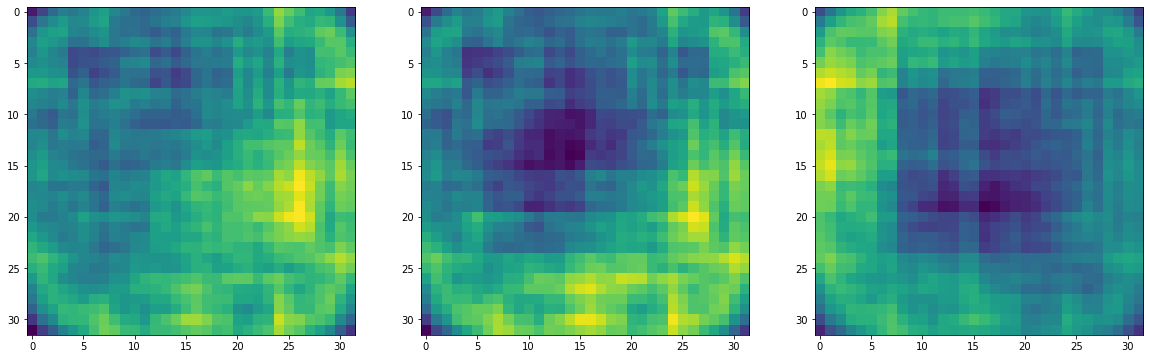

In [16]:
#patches_flat = patches.reshape((patches.shape[0]*patches.shape[1],*patches.shape[2:4]))
utils.displayImagesSideBySide([preds[4].reshape(32,32), preds[5].reshape(32,32), preds[6].reshape(32,32)])